In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Setting seaborn style for better aesthetics
sns.set_style('whitegrid')

In [17]:
# Load the dataset
data = pd.read_csv("BankChurners.csv")

# Display first few rows of the dataset
data.head()

# Drop unnecessary columns (e.g., CLIENTNUM)
data = data.drop(columns=['CLIENTNUM'])

In [19]:
# Check for missing values
data.isnull().sum()

# Summary statistics
data.describe()

# Convert categorical variables into dummy/indicator variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Check the transformed dataset
data_encoded.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,False,False,False,True,False,False,False,False,False,False
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,True,False,False,False,False,True,False,False,False,False
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,False,False,False,False,True,False,False,False,False,False
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,False,True,False,False,False,True,False,False,False,False
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,False,False,False,True,False,False,False,False,False,False


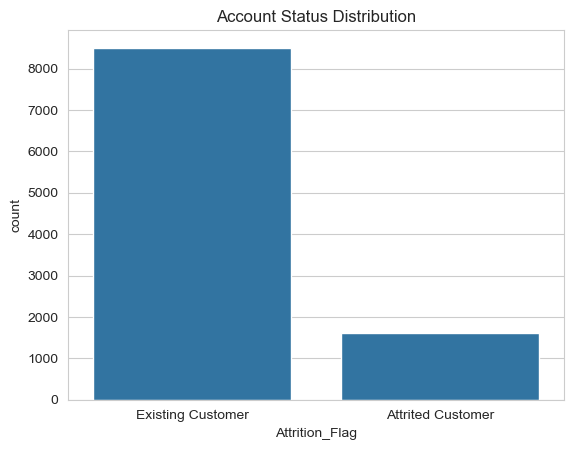

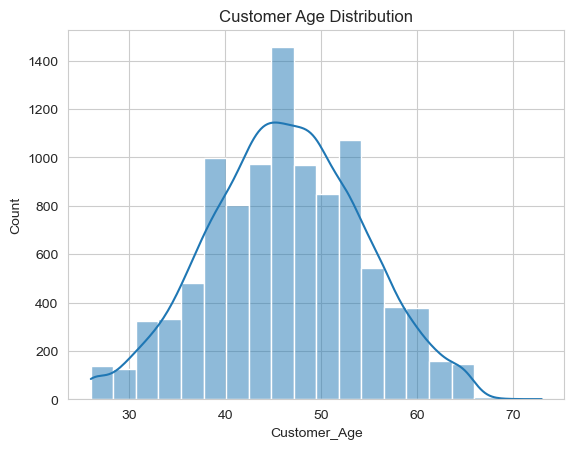

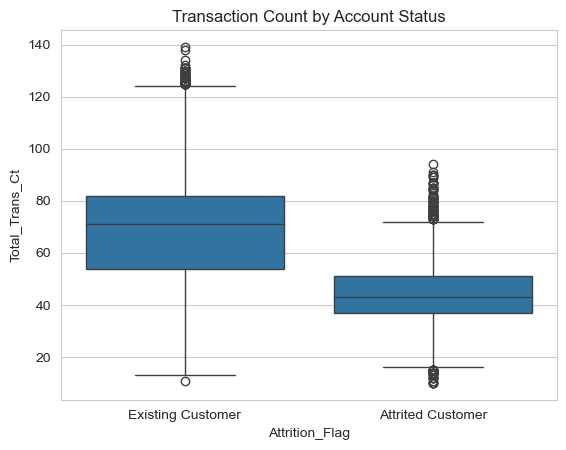

In [21]:
# Distribution of Attrition_Flag
sns.countplot(x="Attrition_Flag", data=data)
plt.title("Account Status Distribution")
plt.show()

# Age distribution
sns.histplot(data['Customer_Age'], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.show()

# Transactions vs. Attrition
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", data=data)
plt.title("Transaction Count by Account Status")
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Convert target column (Attrition_Flag) to binary format
label_mapping = {'Existing Customer': 0, 'Attrited Customer': 1}
data['Attrition_Flag'] = data['Attrition_Flag'].map(label_mapping)

# Preprocessing pipeline
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Trans_Ct']
categorical_features = ['Gender', 'Card_Category', 'Income_Category']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Apply preprocessing
data_preprocessed = preprocessor.fit_transform(data)

K-Means Confusion Matrix:
[[5187 3313]
 [ 944  683]]
K-Means Silhouette Score: 0.2050673170122007


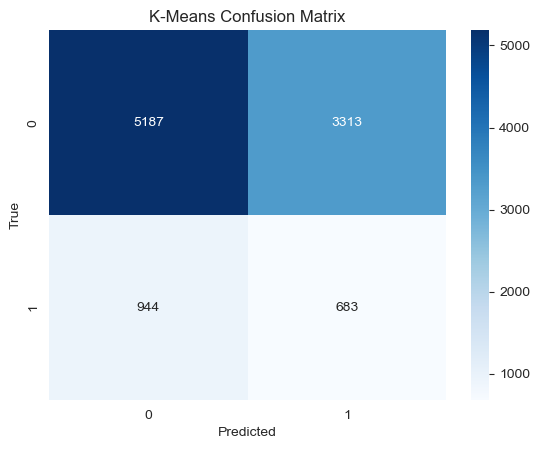

In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(data_preprocessed)

# Confusion Matrix
cm_kmeans = confusion_matrix(data['Attrition_Flag'], kmeans_labels)
print("K-Means Confusion Matrix:")
print(cm_kmeans)

# Silhouette Score
silhouette_kmeans = silhouette_score(data_preprocessed, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_kmeans}")

# Plot Confusion Matrix
sns.heatmap(cm_kmeans, annot=True, fmt='d', cmap='Blues')
plt.title("K-Means Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Agglomerative Clustering Confusion Matrix:
[[5223 3277]
 [ 994  633]]
Agglomerative Clustering Silhouette Score: 0.17357154849707837


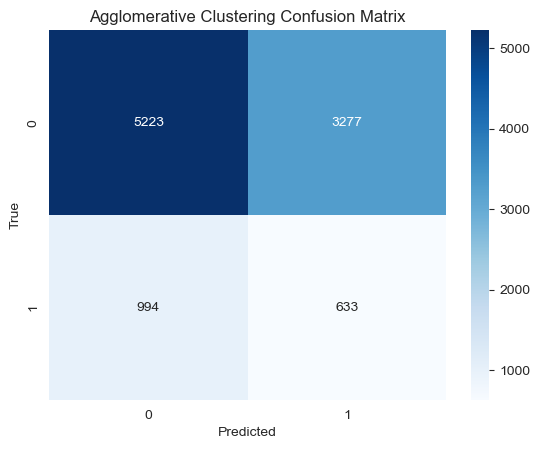

In [31]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(data_preprocessed)

# Confusion Matrix
cm_agg = confusion_matrix(data['Attrition_Flag'], agg_labels)
print("Agglomerative Clustering Confusion Matrix:")
print(cm_agg)

# Silhouette Score
silhouette_agg = silhouette_score(data_preprocessed, agg_labels)
print(f"Agglomerative Clustering Silhouette Score: {silhouette_agg}")

# Plot Confusion Matrix
sns.heatmap(cm_agg, annot=True, fmt='d', cmap='Blues')
plt.title("Agglomerative Clustering Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Gaussian Mixture Confusion Matrix:
[[ 583 7917]
 [ 108 1519]]
Gaussian Mixture Silhouette Score: 0.07178402215921512


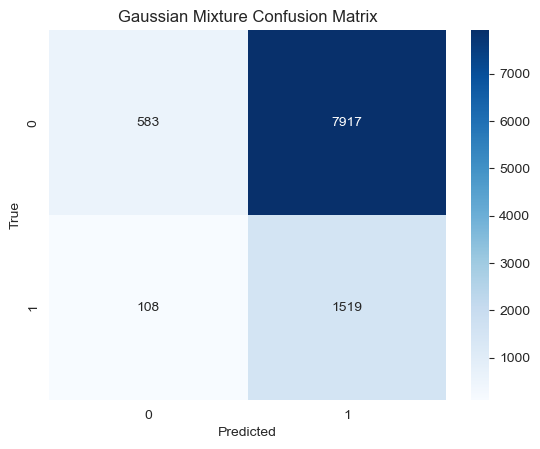

In [33]:
from sklearn.mixture import GaussianMixture

# Gaussian Mixture
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(data_preprocessed)

# Confusion Matrix
cm_gmm = confusion_matrix(data['Attrition_Flag'], gmm_labels)
print("Gaussian Mixture Confusion Matrix:")
print(cm_gmm)

# Silhouette Score
silhouette_gmm = silhouette_score(data_preprocessed, gmm_labels)
print(f"Gaussian Mixture Silhouette Score: {silhouette_gmm}")

# Plot Confusion Matrix
sns.heatmap(cm_gmm, annot=True, fmt='d', cmap='Blues')
plt.title("Gaussian Mixture Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()